In [29]:
from IPython.display import display, HTML
p="Simulation Function 1:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

In [30]:
import numpy as np
import pandas as pd
import math
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [31]:
## Function 1  ###
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)

#choosing sin(x) as a nonliner function
y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('length of x:',x.shape)
print('length of y:',y.shape)

length of x: torch.Size([200, 1])
length of y: torch.Size([200, 1])


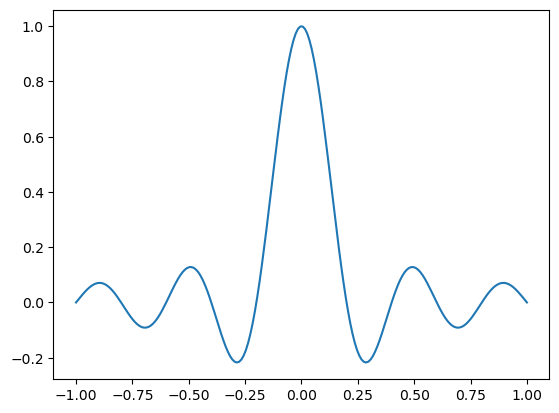

In [32]:
plt.plot(x,y)

In [33]:
#Function for model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("\nModel 1 weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.4317],
        [-0.9914],
        [-0.0428],
        [ 0.6347],
        [-0.4115]])
hiddenlayer1.bias 	 tensor([-0.2316,  0.2489, -0.0049, -0.5013,  0.1848])
hiddenlayer2.weight 	 tensor([[ 0.2873, -0.2456, -0.2330,  0.3158,  0.2299],
        [-0.3874,  0.3971, -0.3853,  0.4302,  0.1438],
        [ 0.0588, -0.2851,  0.1651, -0.1302, -0.1745],
        [-0.1748, -0.3895, -0.1442, -0.3690, -0.1273],
        [ 0.0389, -0.3130, -0.1398, -0.0048, -0.2329],
        [ 0.2591, -0.2597, -0.3599,  0.2793, -0.3744],
        [-0.3238,  0.3119, -0.3857, -0.2017, -0.3929],
        [-0.2646, -0.3032,  0.3772, -0.3874,  0.0263],
        [-0.1299, -0.1856,  0.1782,  0.0963, -0.1513],
        [-0.2748,  0.3021, -0.1327, -0.1896, -0.2235]])
hiddenlayer2.bias 	 tensor([-0.1445, -0.1888,  0.2961, -0.4351,  0.4280, -0.1536, -0.1961,  0.1134,
        -0.1460,  0.4303])
hiddenlayer3.weight 	 tensor(

In [34]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [35]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

C:\Users\fujai\AppData\Local\Temp\ipykernel_23948\2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\fujai\AppData\Local\Temp\ipykernel_23948\2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [36]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.0917
epoch: 200, loss = 0.0854
epoch: 300, loss = 0.0471
epoch: 400, loss = 0.0070
epoch: 500, loss = 0.0060
epoch: 600, loss = 0.0054
epoch: 700, loss = 0.0050
epoch: 800, loss = 0.0044
epoch: 900, loss = 0.0029
epoch: 1000, loss = 0.0015
epoch: 1100, loss = 0.0014
epoch: 1200, loss = 0.0014
epoch: 1300, loss = 0.0014
epoch: 1400, loss = 0.0014
epoch: 1500, loss = 0.0014
epoch: 1600, loss = 0.0014
epoch: 1700, loss = 0.0014
epoch: 1800, loss = 0.0014
epoch: 1900, loss = 0.0014
epoch: 2000, loss = 0.0014
epoch: 2100, loss = 0.0014
epoch: 2200, loss = 0.0014
epoch: 2300, loss = 0.0014
epoch: 2400, loss = 0.0013
epoch: 2500, loss = 0.0013
epoch: 2600, loss = 0.0013
epoch: 2700, loss = 0.0013
epoch: 2800, loss = 0.0013
epoch: 2900, loss = 0.0013
epoch: 3000, loss = 0.0013
epoch: 3100, loss = 0.0013
epoch: 3200, loss = 0.0013
epoch: 3300, loss = 0.0013
epoch: 3400, loss = 0.0012
epoch: 3500, loss = 0.0011
Converged: 0.0009975815


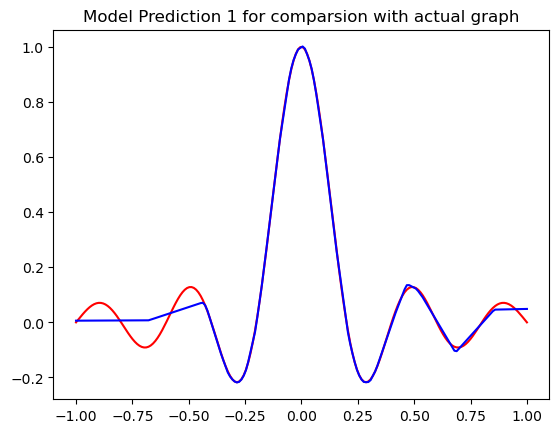

In [37]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [38]:
#Function for model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

        
#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("\nModel 2 weight and bias before training\n")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572

Model 2 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.2076],
        [ 0.6139],
        [-0.3965],
        [ 0.5122],
        [-0.2495],
        [-0.0303],
        [-0.6508],
        [-0.7972],
        [-0.1493],
        [-0.5333]])
hiddenlayer1.bias 	 tensor([-0.6933,  0.5837, -0.0331, -0.9713,  0.5651, -0.3524, -0.8470,  0.6170,
        -0.6725, -0.4743])
hiddenlayer2.weight 	 tensor([[-0.1661, -0.0890,  0.2067,  0.1414, -0.0159, -0.0080,  0.0836,  0.2288,
          0.2494, -0.2642],
        [ 0.0886,  0.1037, -0.2119, -0.1198,  0.1905, -0.1974, -0.2237, -0.2399,
         -0.0920,  0.2605],
        [ 0.2791, -0.0297, -0.0529, -0.2028, -0.0764, -0.1949,  0.1404,  0.2021,
         -0.1354,  0.1157],
        [-0.2276, -0.1151,  0.0772,  0.1821, -0.1342, -0.0999, -0.3117,  0.2829,
          0.3006, -0.2273],
        [-0.2818,  0.2368,  0.2171, -0.1218, -0.0020,  0.2977, -0.2772, -0.1100,
          0.1956, -0.1237],
        [-0.24

In [39]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.0699
epoch: 200, loss = 0.0219
epoch: 300, loss = 0.0081
epoch: 400, loss = 0.0041
epoch: 500, loss = 0.0029
epoch: 600, loss = 0.0020
epoch: 700, loss = 0.0038
epoch: 800, loss = 0.0017
epoch: 900, loss = 0.0017
epoch: 1000, loss = 0.0019
epoch: 1100, loss = 0.0016
epoch: 1200, loss = 0.0020
epoch: 1300, loss = 0.0018
epoch: 1400, loss = 0.0017
epoch: 1500, loss = 0.0016
epoch: 1600, loss = 0.0014
Converged: 0.0007456006


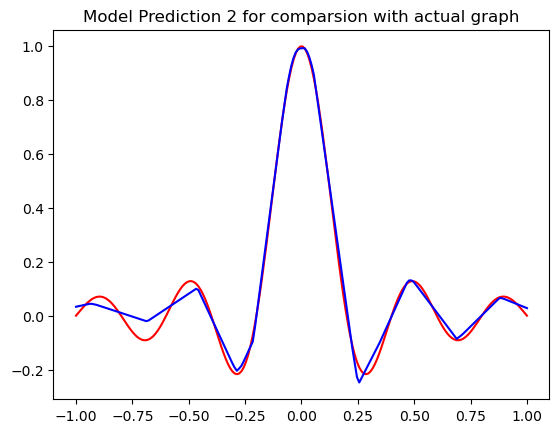

In [40]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [41]:
#Function for model 3
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3 weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3 weight and bias before training
hiddenlayer.weight 	 tensor([[ 0.8742],
        [ 0.7392],
        [-0.9847],
        [-0.0267],
        [ 0.9477],
        [-0.0481],
        [-0.9457],
        [ 0.6804],
        [ 0.7163],
        [-0.1371],
        [ 0.6671],
        [-0.0077],
        [-0.4266],
        [-0.8199],
        [-0.8655],
        [-0.5814],
        [-0.6543],
        [-0.6924],
        [-0.4678],
        [ 0.3560],
        [ 0.2302],
        [-0.6649],
        [-0.4368],
        [-0.1031],
        [ 0.1048],
        [-0.3100],
        [-0.4440],
        [-0.9422],
        [-0.6785],
        [ 0.6062],
        [-0.5684],
        [-0.4523],
        [ 0.5625],
        [-0.3545],
        [ 0.7320],
        [ 0.7261],
        [ 0.3771],
        [ 0.6643],
        [-0.4874],
        [-0.9967],
        [ 0.8265],
        [ 0.8244],
        [-0.1610],
        [ 0.8233],
        [ 0.3492],
        [-0.3722],
        [-0.2559],
        [

In [42]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.0731
epoch: 200, loss = 0.0564
epoch: 300, loss = 0.0434
epoch: 400, loss = 0.0323
epoch: 500, loss = 0.0232
epoch: 600, loss = 0.0162
epoch: 700, loss = 0.0116
epoch: 800, loss = 0.0087
epoch: 900, loss = 0.0070
epoch: 1000, loss = 0.0058
epoch: 1100, loss = 0.0050
epoch: 1200, loss = 0.0044
epoch: 1300, loss = 0.0039
epoch: 1400, loss = 0.0034
epoch: 1500, loss = 0.0030
epoch: 1600, loss = 0.0026
epoch: 1700, loss = 0.0022
epoch: 1800, loss = 0.0019
epoch: 1900, loss = 0.0017
epoch: 2000, loss = 0.0015
epoch: 2100, loss = 0.0013
epoch: 2200, loss = 0.0012
epoch: 2300, loss = 0.0011
epoch: 2400, loss = 0.0010
Converged: 0.0009992903


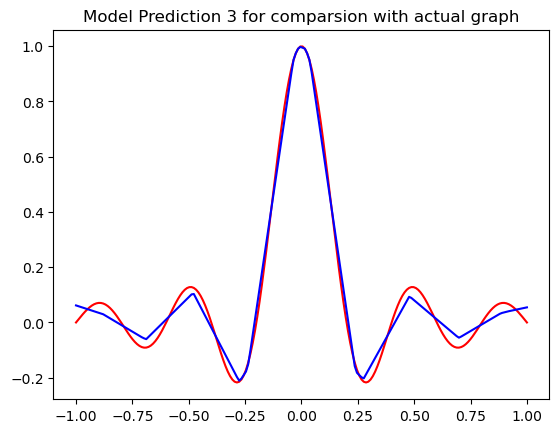

In [43]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

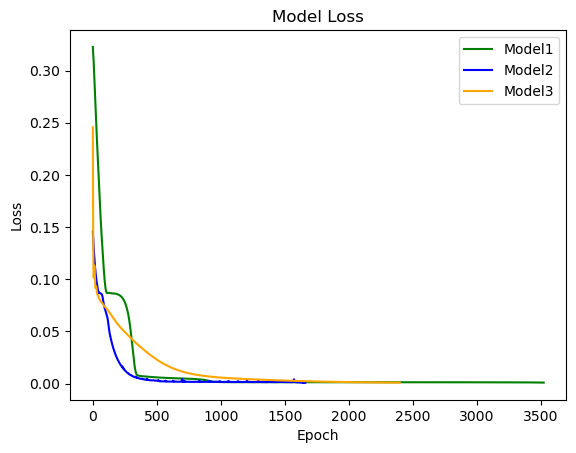

In [44]:
#Plotting the loss functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "orange")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch.png')
plt.show()

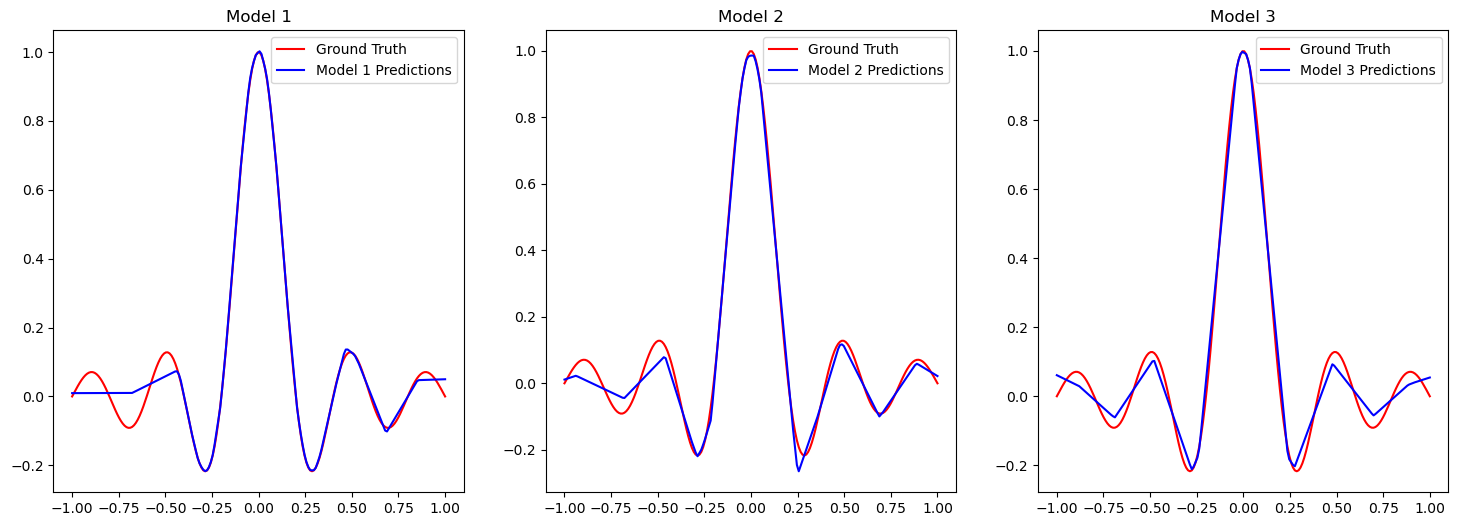

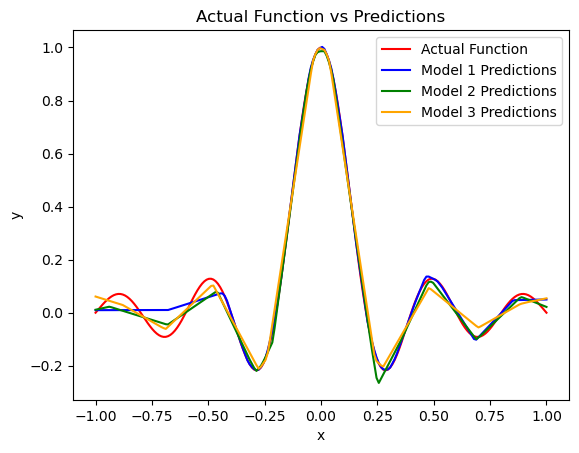

In [45]:
# Plotting the ground truth and predictions
with torch.no_grad():
    predictions1 = model1(x)
    predictions2 = model2(x)
    predictions3 = model3(x)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions1.numpy(), label='Model 1 Predictions', color="blue")
plt.title('Model 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions2.numpy(), label='Model 2 Predictions', color="blue")
plt.title('Model 2')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions3.numpy(), label='Model 3 Predictions', color="blue")
plt.title('Model 3')
plt.legend()

plt.show()

# Plotting the actual function vs all predictions
plt.plot(x.numpy(), y.numpy(), label='Actual Function', color="red")
plt.plot(x.numpy(), predictions1.numpy(), label='Model 1 Predictions', color="blue")
plt.plot(x.numpy(), predictions2.numpy(), label='Model 2 Predictions', color="green")
plt.plot(x.numpy(), predictions3.numpy(), label='Model 3 Predictions', color="orange")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual Function vs Predictions')
plt.legend()
plt.show()


In [46]:
from IPython.display import display, HTML
p="Simulation Function 2:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

In [47]:
import numpy as np
import pandas as pd
import math
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [48]:
###   Function 2 #####
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)

#choosing sin(x) as a nonliner function
y = (np.sign(np.sin(5*np.pi*x)))

print('length of x:',x.shape)
print('length of y:',y.shape)

length of x: torch.Size([200, 1])
length of y: torch.Size([200, 1])


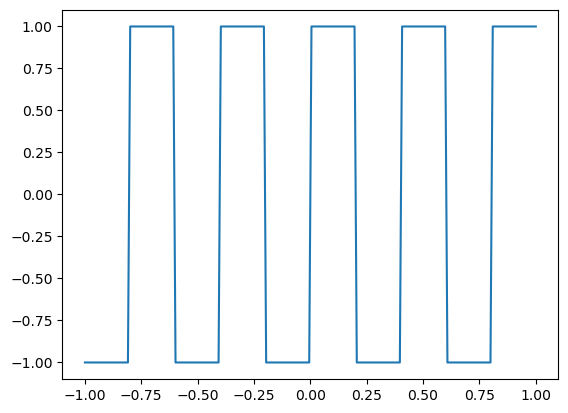

In [49]:
plt.plot(x,y)

In [50]:
#Function for model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("Model 1: weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571
Model 1: weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.0792],
        [-0.8956],
        [ 0.2861],
        [ 0.0317],
        [ 0.6893]])
hiddenlayer1.bias 	 tensor([ 0.9966, -0.4395, -0.6661,  0.9067,  0.9613])
hiddenlayer2.weight 	 tensor([[ 0.3302,  0.3219, -0.2226,  0.0686, -0.0691],
        [ 0.3426, -0.1936,  0.2913, -0.3144, -0.4117],
        [-0.1520,  0.0965,  0.3194, -0.0081,  0.3002],
        [ 0.0907, -0.1533,  0.2891,  0.2876, -0.0077],
        [-0.3428, -0.3479,  0.1966,  0.3642, -0.2861],
        [-0.0935,  0.2258,  0.4311, -0.3760,  0.2097],
        [ 0.0826, -0.2676, -0.1722,  0.2765, -0.3451],
        [ 0.3850,  0.3396,  0.3305, -0.3912, -0.0413],
        [ 0.2094,  0.0429,  0.3924,  0.0751, -0.2497],
        [-0.0608, -0.2666, -0.0267, -0.1350,  0.4159]])
hiddenlayer2.bias 	 tensor([-0.0311,  0.4049, -0.3144, -0.2088, -0.0276, -0.3199, -0.4100,  0.3563,
        -0.2673,  0.0721])
hiddenlayer3.weight 	 tensor(

In [51]:
def testing(model,x,y):
    max_epoch = 20000
    epoch_array = []
    loss_array=[]
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Reached to Maximum Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [52]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

C:\Users\fujai\AppData\Local\Temp\ipykernel_23948\2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\fujai\AppData\Local\Temp\ipykernel_23948\2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [53]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 1.0029
epoch: 200, loss = 0.9703
epoch: 300, loss = 0.9595
epoch: 400, loss = 0.9475
epoch: 500, loss = 0.8929
epoch: 600, loss = 0.8255
epoch: 700, loss = 0.7756
epoch: 800, loss = 0.7610
epoch: 900, loss = 0.7401
epoch: 1000, loss = 0.7264
epoch: 1100, loss = 0.7209
epoch: 1200, loss = 0.7132
epoch: 1300, loss = 0.7029
epoch: 1400, loss = 0.6912
epoch: 1500, loss = 0.6788
epoch: 1600, loss = 0.6680
epoch: 1700, loss = 0.6034
epoch: 1800, loss = 0.5996
epoch: 1900, loss = 0.5978
epoch: 2000, loss = 0.5974
epoch: 2100, loss = 0.5952
epoch: 2200, loss = 0.5950
epoch: 2300, loss = 0.5942
epoch: 2400, loss = 0.5945
epoch: 2500, loss = 0.5943
epoch: 2600, loss = 0.5928
epoch: 2700, loss = 0.5924
epoch: 2800, loss = 0.5922
epoch: 2900, loss = 0.5923
epoch: 3000, loss = 0.5923
epoch: 3100, loss = 0.5920
epoch: 3200, loss = 0.5905
epoch: 3300, loss = 0.5883
epoch: 3400, loss = 0.5743
epoch: 3500, loss = 0.5590
epoch: 3600, loss = 0.5568
epoch: 3700, loss = 0.5554
epoch: 380

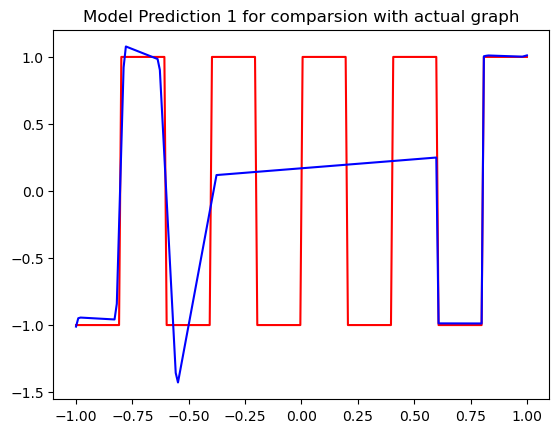

In [54]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [55]:
#Function for model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("Model 2: weight and bias before training")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572
Model 2: weight and bias before training
hiddenlayer1.weight 	 tensor([[-0.8006],
        [ 0.2693],
        [-0.7977],
        [ 0.4434],
        [-0.3091],
        [-0.3075],
        [-0.6013],
        [ 0.6995],
        [-0.9289],
        [-0.3675]])
hiddenlayer1.bias 	 tensor([-0.5983, -0.1292, -0.6857, -0.9825,  0.8614,  0.9233, -0.0169,  0.5765,
         0.7248, -0.3557])
hiddenlayer2.weight 	 tensor([[ 0.1299,  0.2365, -0.1785,  0.0701, -0.0433,  0.0587, -0.1111,  0.2725,
         -0.2022, -0.1975],
        [-0.1910,  0.1251,  0.2488, -0.0896, -0.2452, -0.0719,  0.3005,  0.2168,
         -0.1655,  0.2556],
        [ 0.3066, -0.0581, -0.2316, -0.3108,  0.0829, -0.1666,  0.2597,  0.1388,
          0.2541, -0.2854],
        [-0.3126,  0.1883,  0.0402, -0.2787,  0.2262, -0.2457,  0.1168, -0.0591,
          0.0235, -0.0716],
        [-0.0559, -0.1667,  0.2279,  0.0782, -0.0753, -0.0927,  0.0075,  0.1862,
          0.1774, -0.1529],
        [ 0.088

In [56]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.9442
epoch: 200, loss = 0.6266
epoch: 300, loss = 0.2596
epoch: 400, loss = 0.1281
epoch: 500, loss = 0.1083
epoch: 600, loss = 0.1011
epoch: 700, loss = 0.0895
epoch: 800, loss = 0.0826
epoch: 900, loss = 0.1104
epoch: 1000, loss = 0.0690
epoch: 1100, loss = 0.0687
epoch: 1200, loss = 0.1014
epoch: 1300, loss = 0.0613
epoch: 1400, loss = 0.0609
epoch: 1500, loss = 0.0570
epoch: 1600, loss = 0.0569
epoch: 1700, loss = 0.0563
epoch: 1800, loss = 0.0591
epoch: 1900, loss = 0.0597
epoch: 2000, loss = 0.0533
epoch: 2100, loss = 0.0587
epoch: 2200, loss = 0.0510
epoch: 2300, loss = 0.0485
epoch: 2400, loss = 0.0466
epoch: 2500, loss = 0.0513
epoch: 2600, loss = 0.0517
epoch: 2700, loss = 0.0437
epoch: 2800, loss = 0.0407
epoch: 2900, loss = 0.0401
epoch: 3000, loss = 0.0406
epoch: 3100, loss = 0.0393
epoch: 3200, loss = 0.0417
epoch: 3300, loss = 0.0485
epoch: 3400, loss = 0.0360
epoch: 3500, loss = 0.0330
epoch: 3600, loss = 0.0366
epoch: 3700, loss = 0.0359
epoch: 380

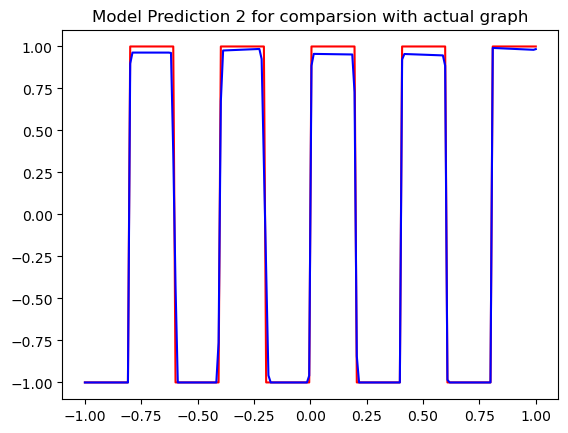

In [57]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()


In [58]:
#Function for model 3
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001) 

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3: weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3: weight and bias before training
hiddenlayer.weight 	 tensor([[-0.4524],
        [ 0.4274],
        [ 0.8731],
        [-0.0331],
        [-0.3646],
        [ 0.4580],
        [ 0.2503],
        [-0.4558],
        [-0.5340],
        [-0.3090],
        [ 0.8504],
        [ 0.5668],
        [ 0.3201],
        [-0.5742],
        [ 0.3152],
        [-0.5816],
        [-0.2512],
        [-0.3567],
        [-0.9553],
        [-0.0815],
        [-0.0307],
        [-0.3705],
        [ 0.8793],
        [-0.4111],
        [ 0.2300],
        [ 0.0671],
        [ 0.7884],
        [ 0.6164],
        [ 0.7465],
        [-0.9523],
        [ 0.2514],
        [-0.8691],
        [-0.5619],
        [ 0.6385],
        [-0.5578],
        [-0.6738],
        [-0.1677],
        [ 0.4372],
        [-0.6727],
        [-0.9434],
        [-0.9852],
        [ 0.3899],
        [ 0.7632],
        [-0.0374],
        [-0.8897],
        [ 0.4926],
        [ 0.4782],
        

In [59]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.9169
epoch: 200, loss = 0.8760
epoch: 300, loss = 0.8466
epoch: 400, loss = 0.8205
epoch: 500, loss = 0.7938
epoch: 600, loss = 0.7662
epoch: 700, loss = 0.7375
epoch: 800, loss = 0.7059
epoch: 900, loss = 0.6702
epoch: 1000, loss = 0.6304
epoch: 1100, loss = 0.5878
epoch: 1200, loss = 0.5444
epoch: 1300, loss = 0.5024
epoch: 1400, loss = 0.4636
epoch: 1500, loss = 0.4288
epoch: 1600, loss = 0.3988
epoch: 1700, loss = 0.3734
epoch: 1800, loss = 0.3520
epoch: 1900, loss = 0.3342
epoch: 2000, loss = 0.3191
epoch: 2100, loss = 0.3065
epoch: 2200, loss = 0.2959
epoch: 2300, loss = 0.2869
epoch: 2400, loss = 0.2792
epoch: 2500, loss = 0.2726
epoch: 2600, loss = 0.2665
epoch: 2700, loss = 0.2610
epoch: 2800, loss = 0.2561
epoch: 2900, loss = 0.2515
epoch: 3000, loss = 0.2473
epoch: 3100, loss = 0.2434
epoch: 3200, loss = 0.2397
epoch: 3300, loss = 0.2362
epoch: 3400, loss = 0.2331
epoch: 3500, loss = 0.2301
epoch: 3600, loss = 0.2271
epoch: 3700, loss = 0.2244
epoch: 380

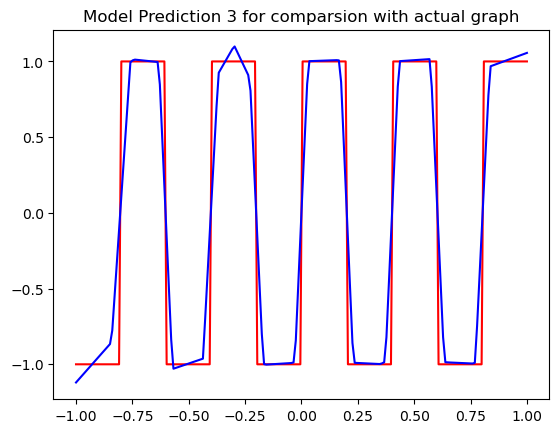

In [60]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

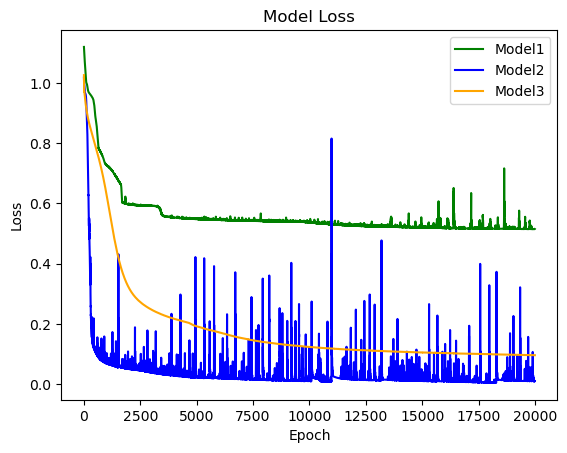

In [61]:
#Plotting the loss functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "orange")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch_function2.png')
plt.show()

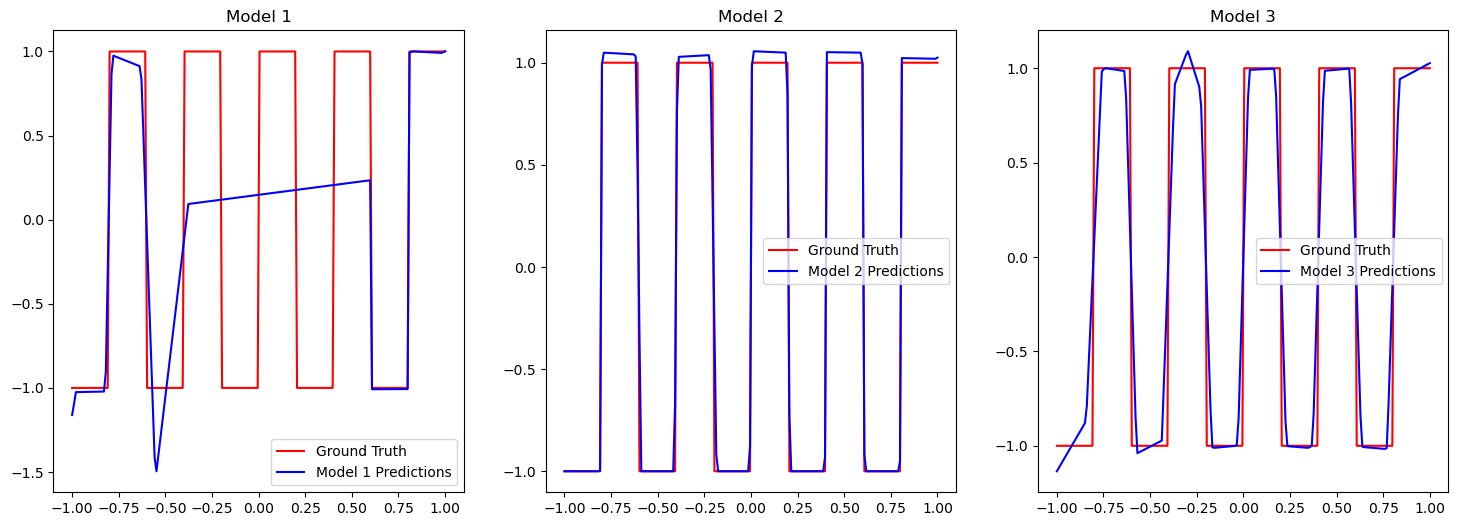

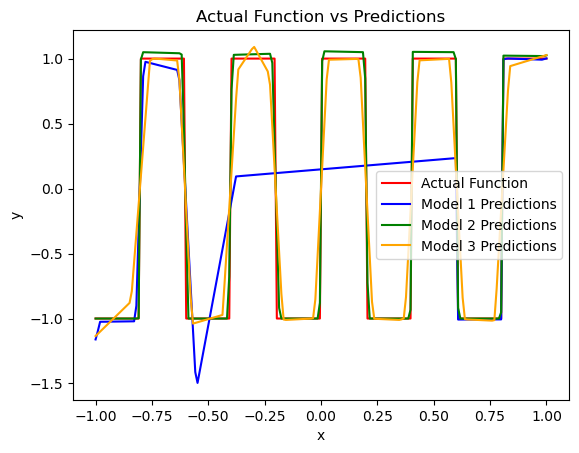

In [62]:
# Plotting the ground truth and predictions
with torch.no_grad():
    predictions1 = model1(x)
    predictions2 = model2(x)
    predictions3 = model3(x)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions1.numpy(), label='Model 1 Predictions', color="blue")
plt.title('Model 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions2.numpy(), label='Model 2 Predictions', color="blue")
plt.title('Model 2')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x.numpy(), y.numpy(), label='Ground Truth', color="red")
plt.plot(x.numpy(), predictions3.numpy(), label='Model 3 Predictions', color="blue")
plt.title('Model 3')
plt.legend()

plt.show()

# Plotting the actual function vs all predictions
plt.plot(x.numpy(), y.numpy(), label='Actual Function', color="red")
plt.plot(x.numpy(), predictions1.numpy(), label='Model 1 Predictions', color="blue")
plt.plot(x.numpy(), predictions2.numpy(), label='Model 2 Predictions', color="green")
plt.plot(x.numpy(), predictions3.numpy(), label='Model 3 Predictions', color="orange")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual Function vs Predictions')
plt.legend()
plt.show()
